<a href="https://colab.research.google.com/github/DanRMO/MPV_SPRINT_II/blob/main/mvp_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - DEEP LEARNING

O travalho visa desenvolver um modelo de deep learning classificando as avalições de hóteis no Trip Advisor que foi obtida no Kagle.

Os atributos são:
**Review:** comentário do hóspede
**Rating:** nota atribuída pelo hóspede

## Importação de bibliotecas e base de dados

In [ ]:
!pip install gdown
import gdown
import os
import zipfile

import numpy as np
import math
import re # For preprocessing
import pandas as pd #For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp # For preprocessing
import string
import random
import matplotlib.pyplot as plt

In [ ]:
!python3 -m spacy download en_core_web_sm
from spacy.lang.en.examples import sentences

2023-07-24 02:10:43.051125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [ ]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds


In [ ]:
# Importação de dataset
url = 'https://raw.githubusercontent.com/DanRMO/TRIPADVIS/main/tripadvisor_hotel_reviews.csv'

# Lê o arquivo
dados = pd.read_csv(url, delimiter =',')

# Mostra as primeiras linhas do dataset
dados.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
folder_path = "./"  # especifique a pasta onde baixara o arquivo
os.makedirs(folder_path, exist_ok=True) # cria a pasta de destino se necessário

output = "trainingandtestdata.zip"  # especifique o nome do arquivo e a extensão do mesmo
gdown.download(url, output)

destination = './' # path onde se encontra o arquivo 'trainingandtestdata.zip'

os.makedirs(destination,exist_ok=True) # cria a pasta de destino se necessário


Downloading...
From: https://raw.githubusercontent.com/DanRMO/TRIPADVIS/main/tripadvisor_hotel_reviews.csv
To: /content/trainingandtestdata.zip
15.0MB [00:00, 19.5MB/s]


In [ ]:
colunas = [ 'Review', "Rating"]

train_data = pd.read_csv(url,  engine = 'python', encoding = 'latin1')

In [ ]:
train_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


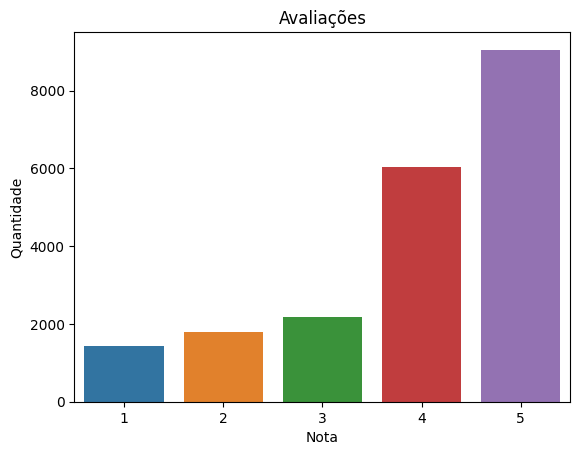

In [ ]:
sns.countplot(data=train_data, x= 'Rating')

# Add labels and title
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.title('Avaliações')

# Show the plot
plt.show()

In [ ]:
test_data = pd.read_csv(url,
    header=None,
    names=colunas,
    engine="python",
    encoding="latin1"
)

In [ ]:
X = dados.iloc[:, 0].values

y = dados.iloc[:,1].values



In [ ]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.80, stratify = y)

In [ ]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5]), array([ 284,  358,  437, 1208, 1811]))

In [ ]:

def clean_tweets(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
  tweet = re.sub(r"[^a-zA-Z.!?]", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet)
  return tweet

In [ ]:
# Carregar o pipeline em inglês do pacote spacy
sp.cli.download("en_core_web_sm")
nlp = sp.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed
#nlp = sp.load('en')

nlp

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
stop_words = sp.lang.en.STOP_WORDS

In [ ]:
len(stop_words)


326

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def clean_tweets2(tweet):
  tweet = tweet.lower()
  document = nlp(tweet)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return words

In [ ]:
t = time()

data_clean = [clean_tweets2(clean_tweets(tweet)) for tweet in X]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))


<ipython-input-163-77b6d4622bcb>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


Time to clean up everything: 1.33 mins


In [ ]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

kens column review singapore fantastic hotels newly opened st regis add list beautiful hotel outstanding service.the rooms excellent pool small nice great spa exercise room food expensive great breakfast buffet outstanding highly recommend hotel second possibly fullerton
bad service deeply disappointed service promised specifichotel room arrived said types rooms hotel confirmation sent marriot stated given room promised attempts madeby hotel fix situatuion
rich local color friendliness daughter stayed st v visit clean friendly staff close french quarter garden district plus price reasonable st v quaint garden pool breakfast new orleans style worth visit stay pricier hotels like new orleans feel check history building
average atenea mar stayed days barcelona rooms small lucky adjoining rooms rooms cheery posh futuristic liked room key slot entryway activate electricity hotel walking distance beach hotel employees nice fixed issues room keys times fixed spoke excellent english.the beds n

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [ ]:
tokenizer.vocab_size

25203

In [ ]:
ids = tokenizer.encode('i am very happy')
ids

[160, 24599, 2665, 5743]

In [ ]:
text = tokenizer.decode(ids)
text

'i am very happy'

In [ ]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[930, 486, 8331, 4160, 14, 930, 486, 54, 939, 3945, 86, 66, 83, 7, 247, 52, 58, 122, 477, 246, 14, 751, 2, 68, 488, 3, 43, 190, 40, 12, 19, 331, 1, 757, 52, 2783, 38, 88, 143, 255, 36, 186, 1720, 41, 102, 226, 435, 599, 137, 2079, 888, 605, 532, 2518, 156, 600, 5817, 1611, 294, 95, 3, 80, 75, 198]
[487, 21082, 30, 2473, 1, 18205, 22524, 34, 1271, 1, 1214, 358, 2451, 202, 21, 145, 23355, 90, 387, 5, 4, 609, 328, 3832, 1362, 5754, 3292, 280, 148, 6850, 11, 188, 5754, 3292, 1217, 5, 4, 830, 4566]
[9, 1, 2591, 2827, 24, 8, 147, 1298, 76, 426, 8062, 533, 659, 229, 66, 358, 353, 1584, 967, 25044, 24993, 25056, 509, 177, 493, 1865, 439, 159, 50, 83, 1573, 248, 1339, 99, 359, 5257, 818, 517, 70, 346, 113, 1, 203, 2, 19, 225, 93, 248, 227, 88, 1166, 223, 74, 359, 818, 241, 1, 359, 603, 392, 1, 1364, 90, 5257, 818, 359, 3798, 337, 818, 151, 2117, 1152, 74, 302, 359, 217, 234, 818, 807, 1, 865, 670, 2128, 1219, 2, 116, 110, 27, 193, 15, 153, 94, 9, 64, 20, 370, 1, 443, 2213, 12446, 7076, 327, 8, 

In [ ]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

1668

In [ ]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[ 340    1 1113 ...    0    0    0]
[  27 1068    1 ...    0    0    0]
[  87   14 1661 ...    0    0    0]
[  79  173 4361 ...    0    0    0]
[  3 133 467 ...   0   0   0]
[  3 239  57 ...   0   0   0]
[35  8 14 ...  0  0  0]
[  3 215 785 ...   0   0   0]
[75  8 14 ...  0  0  0]
[ 14 957  15 ...   0   0   0]


In [ ]:
data_labels = y
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [ ]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

In [ ]:
vocab_size = tokenizer.vocab_size
vocab_size

25203

In [ ]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

5

In [ ]:
dropout_rate = 0.2
nb_epochs = 5

In [ ]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [ ]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
t = time()

history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)
ckpt_manager.save()

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

InvalidArgumentError: ignored

In [ ]:
y_pred_test = Dcnn.predict(test_inputs)

In [ ]:
y_pred_test

In [ ]:
y_pred_test = (y_pred_test > 0.5)

In [ ]:
y_pred_test

In [ ]:
test_labels

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm


In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

In [ ]:
text = 'amazing room'
text = tokenizer.encode(text)
text

In [ ]:
Dcnn(np.array([text]), training=False).numpy()